## Exploritary Data Analysis - Team MenChesthair United - Iditarod 2017

In this Exploritary Data Analysis, we will be looking at the Iditarod race of 2017 as extracted from <a href="https://www.kaggle.com/iditarod/iditarod-race" target="blank">Kaggle</a>. First, we will explain what Iditarod is. Next, we will import all modules and data. After which we will proceed with some Exploritary Data Analysis. 


## Background information: what is Iditarod?

The Iditarod Trail Sled Dog Race is an annual long-distance sled dog race run in early March from Settler's Bay to Nome, which takes place entirely in the US state of Alaska. Mushers and a team of 16 dogs of which at least 5 must be on the towline at the finish line, cover the distance in 8–15 days or more. The Iditarod began in 1973 as an event to test the best sled dog mushers and teams but evolved into today's highly competitive race. Then a record, the second fastest winning time was recorded in 2016 by Dallas Seavey with a time of 8 days, 11 hours, 20 minutes, and 16 seconds. As of 2012, Dallas Seavey was also the youngest musher to win the race at the age of 25. In 2017, at the age of 57, Dallas' father Mitch Seavey is the oldest and fastest person ever to win the race, crossing the line in Nome in 8 days, 3 hours, 40 minutes and 13 seconds. Dallas finished second, two hours and 44 minutes behind. (Wikipedia, april 2017)

## Import all necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import re
sns.set()

%matplotlib inline

## Loading & setting up the Data Frame and descriptives

Before we start to explore the data it is important to load and set up the data frame. The following code is used for that. The dataframe is loaded, columns are edited and new columns are introduced. The position of each rider during the race is added. Besides that, a column called 'arrival day' is added. This is useful because not all the riders arrive at the same day in the same place. 

In [3]:
#importing the dataset
race = pd.read_csv('report.csv')

# Lowercasing and replacing spaces with underscores (enables code such as race.column_name)
race.columns = [x.lower().replace(" ", "_") for x in race.columns]

# Select unique racers before dataframe order changes 
#racers = race.ix[0:71,0:4]

# Updating the dataframe to include the finish position
new_df = pd.read_excel('iditarod2017.xlsx')
pos_name = new_df[['finish_position', 'name']]
#pos_name= new_df.ix[:, 0:2].drop([0])
#pos_name.columns= ['finish_position', 'name']

#inserting the position into the race dataframe
race= pd.merge(race, pos_name, on="name", how="inner")

#create new dataframe for later operations
times = pd.read_csv('report.csv',usecols=['Number','Name','Checkpoint','Distance','Speed','Time','Elapsed Time','Departure Dogs'])

The Iditarod Trail Sled Dog Race is an annual long-distance sled dog race run in early March from Settler's Bay to Nome, which takes place entirely in the US state of Alaska. Mushers and a team of 16 dogs of which at least 5 must be on the towline at the finish line, cover the distance in 8–15 days or more (Wikipedia, april 2017).

5 weeks ago, 72 riders (mushers) started the race of 2017. During that race is data collected and described by several variables. These variables are described below.

### Description of variables: 

* Number: the identifiction number of each musher (sled rider).
* Name: name of the musher.
* Status: rookie or veteran.
* Country: Musher's country of origin.
* Checkpoint: name of the checkpoint, all columns to the right of it are descriptive for only that checkpoint.
* Latitude: lines from pole to pole.
* Longtitude: lines parallel to the equator.
* Distance: the distance relative to previous checkpoint.
* Time:  time it took to get from the previous checkpoint to the current one. (hours):(fraction of minutes) eg 5:85
* Speed: average speed between previous and current checkpoint, in miles per hour.
* Arrival_date: date of arrival at checkpoint
* Arrival_time: time of arrival at checkpoint
* Arrival_dogs: amount of dogs that arrived at checkpoint
* Elapsed_time: time that elapsed while resting at the checkpoint 
* Departure_date: day of departure from the checkpoint
* Departure_dogs: amount of dogs that departed from the checkpoint
* Finish_position: the musher's finish position in the race

### Head, shape and info

In [4]:
race.head()

,number,name,status,country,checkpoint,latitude,longitude,distance,time,speed,arrival_date,arrival_time,arrival_dogs,elapsed_time,departure_date,departure_time,departure_dogs,finish_position
0,2,Ryan Redington,Veteran,United States,Fairbanks,64.8321,-147.8130,NaN,0.00,NaN,NaN,NaN,NaN,0.00,03/06/2017,11:00:00,16.0,14
1,2,Ryan Redington,Veteran,United States,Nenana,64.5952,-149.0897,60.0,6.17,9.73,03/06/2017,17:10:00,16.0,2.98,03/06/2017,20:09:00,16.0,14
2,2,Ryan Redington,Veteran,United States,Manley,65.0317,-150.6352,90.0,12.92,6.97,03/07/2017,09:04:00,16.0,0.62,03/07/2017,09:41:00,14.0,14
3,2,Ryan Redington,Veteran,United States,Tanana,65.2010,-152.0816,66.0,11.65,5.67,03/07/2017,21:20:00,14.0,8.22,03/08/2017,05:33:00,13.0,14
4,2,Ryan Redington,Veteran,United States,Ruby,64.7386,-155.5011,119.0,24.60,4.84,03/09/2017,06:09:00,13.0,3.27,03/09/2017,09:25:00,12.0,14


In [5]:
print(race.shape)

(1129, 18)


As we can see above, we have 1129 observations for 18 variables. 

In [6]:
print(race.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129 entries, 0 to 1128
Data columns (total 18 columns):
number             1129 non-null int64
name               1129 non-null object
status             1129 non-null object
country            1129 non-null object
checkpoint         1129 non-null object
latitude           1129 non-null float64
longitude          1129 non-null float64
distance           1058 non-null float64
time               1129 non-null float64
speed              1058 non-null float64
arrival_date       1058 non-null object
arrival_time       1058 non-null object
arrival_dogs       1058 non-null float64
elapsed_time       1128 non-null float64
departure_date     1058 non-null object
departure_time     1058 non-null object
departure_dogs     1058 non-null float64
finish_position    1129 non-null int64
dtypes: float64(8), int64(2), object(8)
memory usage: 167.6+ KB
None


As we can see above, there are some datapoints missing for some variables. This has probably to do with drop-outs. 

In [7]:
len(race.name.unique())

71

As we can see, there are 71 unique names, which means there are 71 mushes (contestens).

## Exporitary Data Analysis

### Nationalities

As mentioned before 71 mushers started the race. Most of them, 59, come from the US. Two mushers come from Canada and all the others are from European countries. How the nationalities are divided is shown in the pie chart below.

In [8]:
countries = pd.Series(race[['country','name']].drop_duplicates().country.value_counts())
print(countries)

United States     59
Norway             4
Canada             2
France             2
Czech Republic     1
Sweden             1
England            1
Hungary            1
Name: country, dtype: int64


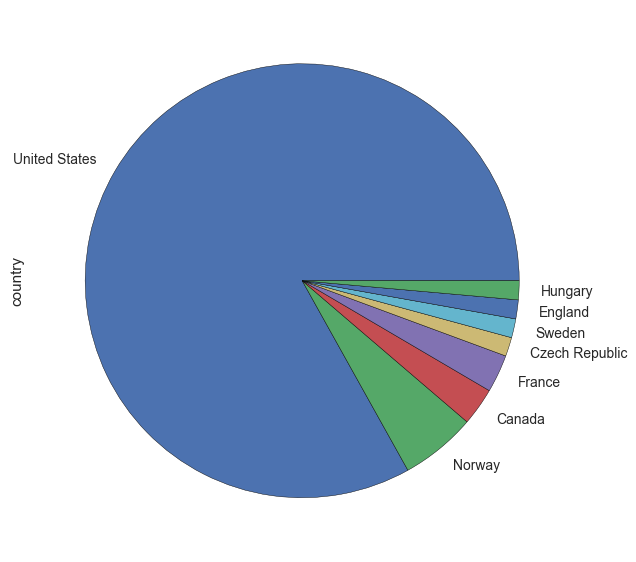

In [9]:
countries.plot(kind='pie', figsize=(7,7))

### Rookie vs Veteran

As in every competition there will be experienced and new participants (rookies). The pie chart below shows us that almost a quarter of the mushers are participating for the first time. 

In [10]:
status = pd.Series(race.status.value_counts())
print(status)

Veteran    872
Rookie     257
Name: status, dtype: int64


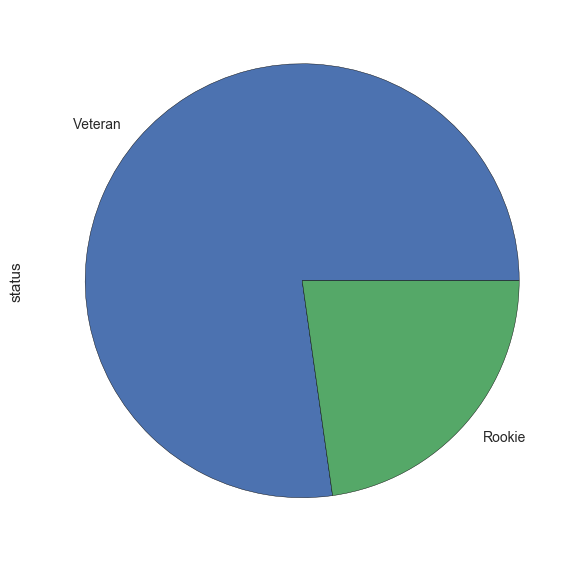

In [11]:
status.plot(kind='pie', figsize=(7,7))

### Distribution of dogs

<span style="color:red">These two cells seem not to work all the time. When we start up the notebook it does, but if the cell is run a second time it gives an error.</span>

Each team is composed of twelve to sixteen dogs, and no more may be added during the race. At least five dogs must be on the towline when crossing the finish line in Nome. Mushers keep a veterinary diary on the trail and are required to have it signed by a veterinarian at each checkpoint. Dogs that become exhausted or injured may be carried in the sled's "basket" to the next "dog-drop" site. 

Therefore it is useful to analyze the amount of dogs departed from each checkpoint.

The boxplot shows that in the first 2 checkpoints all the dogs depart. The further the race evaluates the median shifts from 16 to 10. Still there is a big difference between the minimum and maximum dogs that depart each stage. For example, in Elim and Safety were mushers that started with only 7 dogs but also mushers that start with all the 16 dogs. 

In [12]:
# Calculate the cumulative time to get at the specific checkpoint for every musher and define test

mushers = pd.DataFrame(index=[times['Checkpoint'].unique()])
for nr in range(2,74):
    test = times[times['Number'] == nr]
    test['total time'] = test['Time'] + test['Elapsed Time']
    test['total time'] = test['total time'].cumsum(axis=0)
    musher1 = test[['total time']]
    if len(musher1) != 17:
        empty = pd.DataFrame([0.0 for n in range(17 - len(musher1))],columns=['total time'])
        musher1 = pd.concat([musher1,empty])
    musher1.index = times.Checkpoint.unique()
    musher1.columns = [test[['Name']].iloc[0,0]]
    mushers = pd.concat([mushers,musher1],axis=1,names=[test['Checkpoint']])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


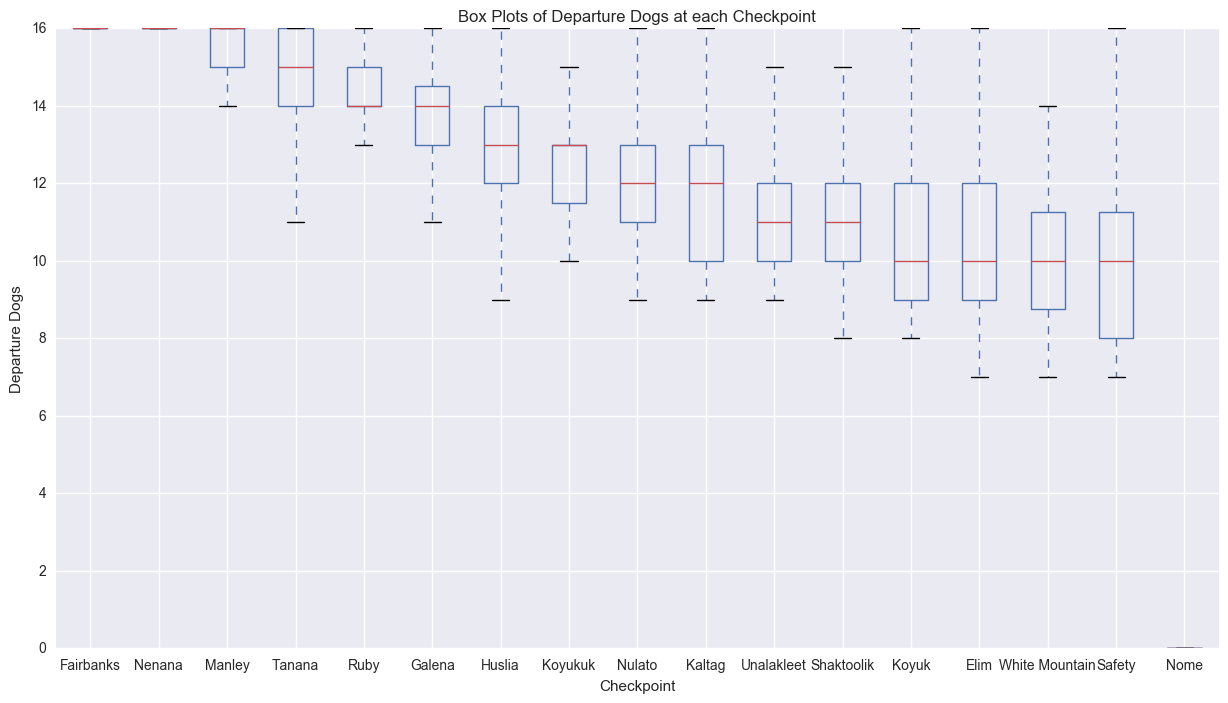

In [13]:
#Calculate the amount of dogs departed from each checkpoint

dogs = pd.DataFrame(index=[test['Checkpoint']])
for nr in range(2,74):
    test = times[times['Number'] == nr]
    dogs1 = test[['Departure Dogs']]
    if len(dogs1) != 17:
        empty = pd.DataFrame([0.0 for n in range(17 - len(dogs1))],columns=['Departure Dogs'])
        dogs1 = pd.concat([dogs1,empty])
    dogs1.index = times.Checkpoint.unique()
    dogs1.columns = [test.Name[nr-2]]
    dogs = pd.concat([dogs,dogs1],axis=1,names=[test['Checkpoint']])
dogs = dogs.transpose()

#Plot dogs departed per checkpoint as boxplots

dogs.plot(kind='box', figsize=(15,8))
plt.xlabel('Checkpoint')
plt.ylabel('Departure Dogs')
plt.title('Box Plots of Departure Dogs at each Checkpoint')
plt.show()

### Participants

Not everyone will reach the finish line. The following barchart shows the amount of contestent left at each checkpoint.

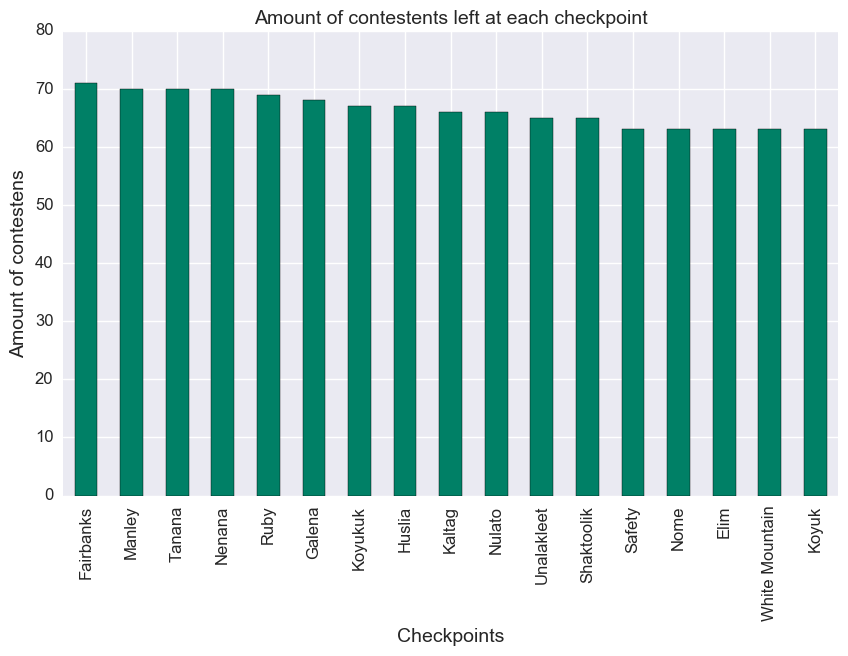

In [14]:
contestents = pd.Series(data=race.checkpoint.value_counts())
plt.title('Amount of contestents left at each checkpoint', size=14)
plt.ylabel('Amount of contestens', size=14)
plt.xlabel('Checkpoints', size=14)
contestents.plot(kind="bar", figsize=(10,6), fontsize=12, colormap='summer')

### Arrival and departure dogs

Not every dog will make it to the finish line either. The first graph below makes this very clear. Around 1100 dogs start the race and around 650 of them will make it to the finish line. When the blue and green bar differ a lot the race to that checkpoint can be seen as heavy. Therefore is an extra graph added which shows the distance between the checkpoints. 

For example, the distance between Koyukuk and Nulato is small and so almost all the dogs that arrived in Nulato will depart from there as well because the race was not too heavy in terms of distance. 

(0, 150)

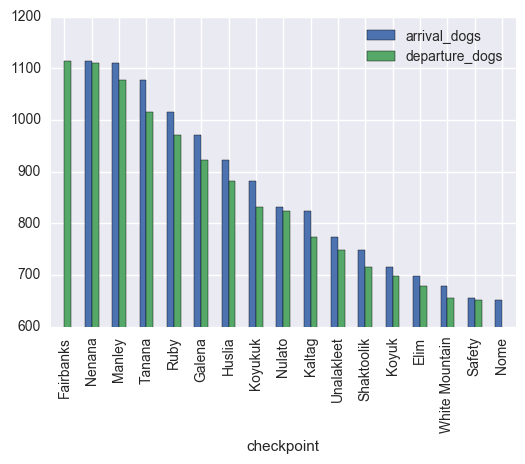

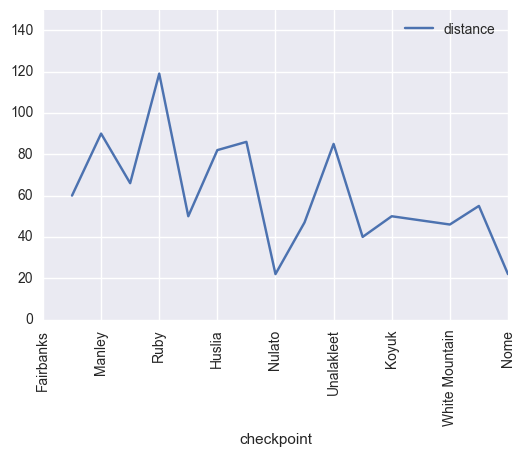

In [15]:
#create checkpoint_number, 
race['checkpoint_number'] = [list(race.checkpoint).index(checkpoint) for checkpoint in race.checkpoint]
race_dogs = race[['checkpoint', 'departure_dogs', 'arrival_dogs', 'distance']].groupby('checkpoint')[['departure_dogs', 'arrival_dogs']].sum().reset_index()
race_dogs['dogs_dropout'] = race_dogs.arrival_dogs - race_dogs.departure_dogs
distance = race[['checkpoint', 'distance', 'checkpoint_number']].groupby('checkpoint').mean().reset_index()
distance_dogs = pd.merge(distance, race_dogs, on='checkpoint', how='outer').set_index('checkpoint_number').sort_index()

dogs_dropout_pot = distance_dogs.plot(x='checkpoint', y=['arrival_dogs', 'departure_dogs'], kind='Bar')
dogs_dropout_pot.set_ylim(600, 1200)
distance_plot = distance_dogs.plot(x='checkpoint', y='distance', kind='line', rot=90)
distance_plot.set_ylim(0,150)

#### Arrival and departure dogs difference between rookies and veterans

Here we visualised the differences between rookie and veteran dog losses, to see whether there are differences between the two groups

In [16]:
#calculate dog_loss for every muster and checkpoint
test_df= deepcopy(race)
test_df['dog_loss'] = test_df['arrival_dogs'] - test_df[ 'departure_dogs']

#calculate race_time for every muster and checkpoint
test_df['race_time'] = test_df['time']+test_df['elapsed_time']
test_df['race_time (sec.)'] = test_df['race_time']*3600

In [18]:
#sort musters by total race_time
test_df_timesorted=(test_df.groupby(['status','name']).sum().reset_index()).sort_values(by='race_time', ascending=True)
test_df_timesorted= test_df_timesorted.loc[test_df_timesorted.distance == 968]

In [19]:
#seperate veterans from rookies, sort on race time and select only those who finished the race
test_df_timesorted_veterans = test_df_timesorted[test_df_timesorted.status == 'Veteran']
test_df_timesorted_veterans.sort_values(by='race_time', ascending=True)
test_df_timesorted_veterans= test_df_timesorted_veterans.loc[test_df_timesorted.distance == 968]

#seperate rookies from veterans, sort on race time and select only those who finished the race
test_df_timesorted_rookie = test_df_timesorted[test_df_timesorted.status == 'Rookie']
test_df_timesorted_rookie.sort_values(by='race_time', ascending=True)
test_df_timesorted_rookie= test_df_timesorted_rookie.loc[test_df_timesorted.distance == 968]

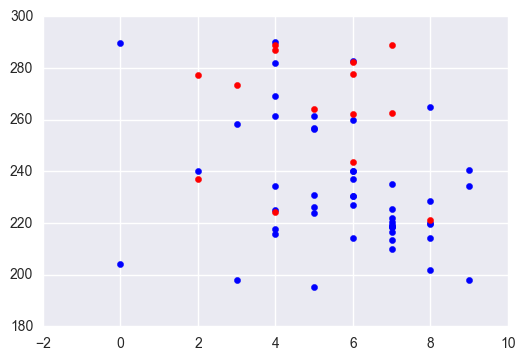

In [20]:
#create a scatter plot with rookie (red) and veteran (blue) dog losses on the x-axis and the race time on the y-axis
plt.scatter(test_df_timesorted_veterans['dog_loss'], test_df_timesorted_veterans['race_time'], color='blue')

plt.scatter(test_df_timesorted_rookie['dog_loss'].ravel(), test_df_timesorted_rookie['race_time'], color='red')

### The relationship between race time/speed and racetime/dog losses. 

In this jointplot we can see density plots for race time/speed and for race time/dog losses. It appears that the relation between dog losses and race time is more telling than is the relationship between speed and race time. In the plots you see that both relationships are approaching normal. 

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


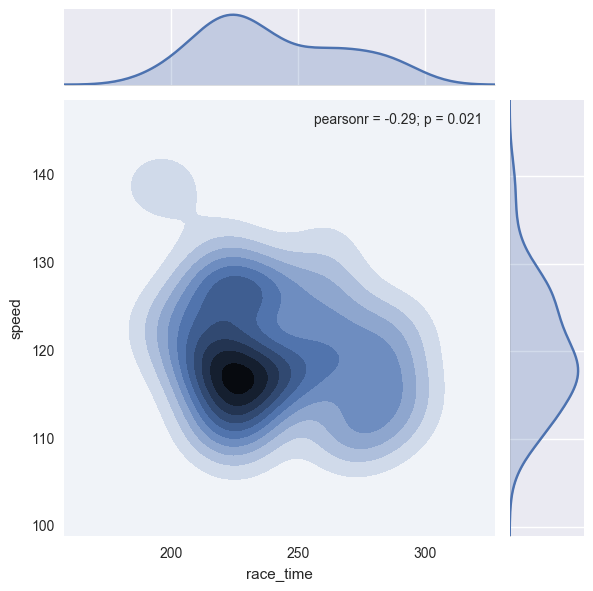

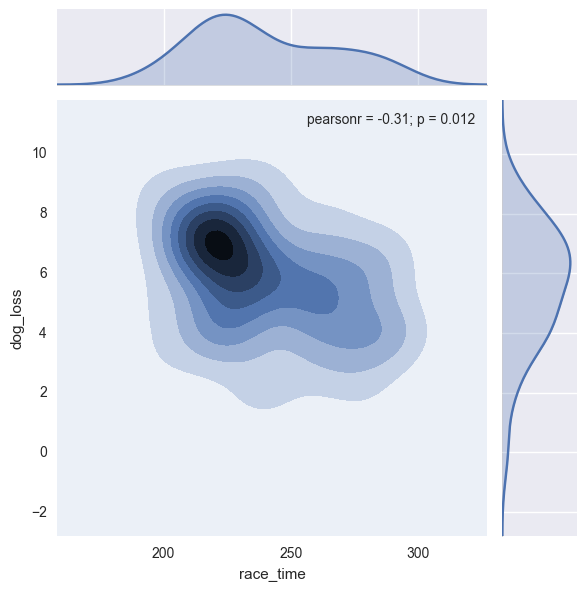

In [21]:
#visualising the occurances of race_time against speed 
sns.jointplot("race_time", "speed", data=test_df_timesorted, kind='kde')

#visualising the occurances of race_time against dog_losses 
sns.jointplot("race_time", "dog_loss", data=test_df_timesorted, kind='kde')

### Drop-outs per checkpoint

In the following figure, we can see that there is after the checkpoint unalakleet, two groups seem to be forming, a quicker one and a slower one.

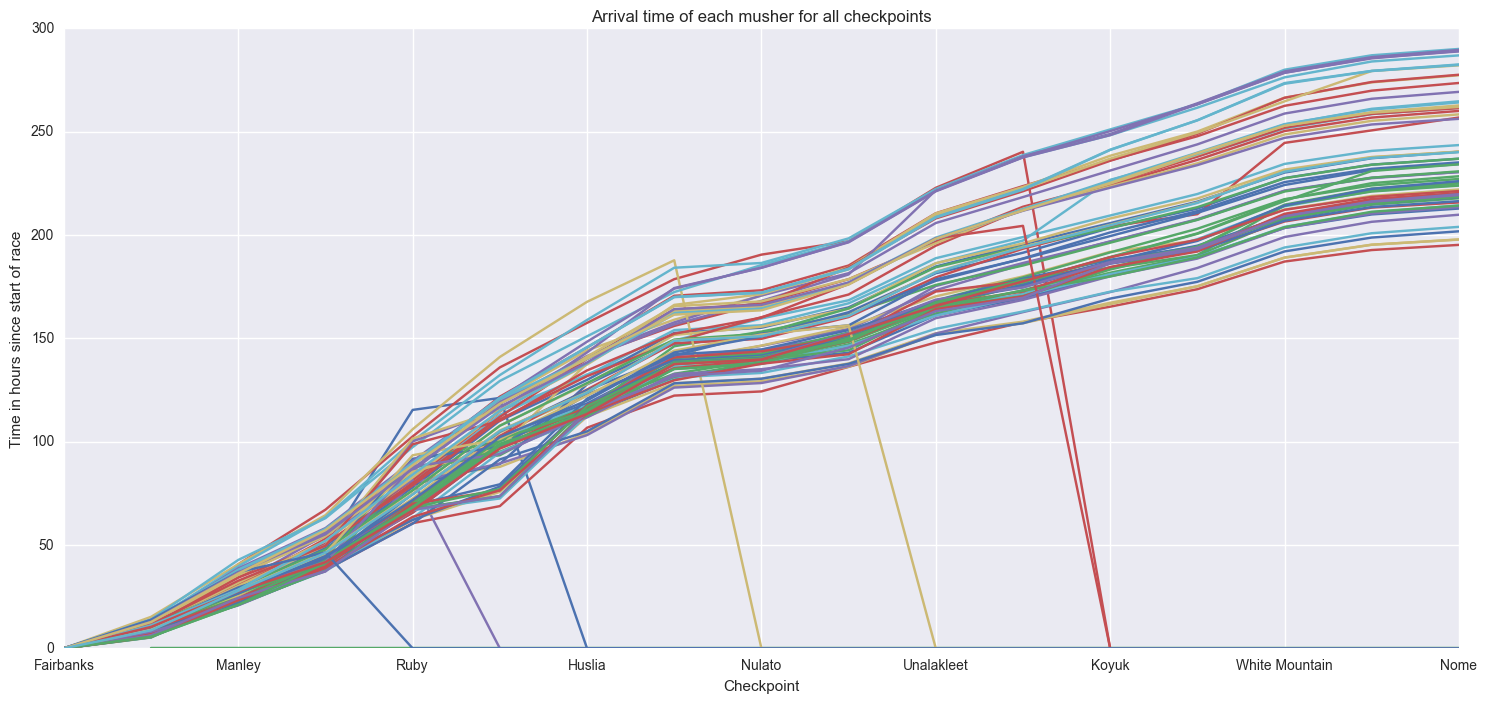

In [22]:
#Show how the cumulative times between mushers changes

mushers.plot(kind='line',figsize=(18,8),legend=False)
plt.xlabel('Checkpoint')
plt.ylabel('Time in hours since start of race')
plt.title('Arrival time of each musher for all checkpoints')
plt.show()

### Speed per checkpoint
In the plot below, we can see that the speed for each musher varies a lot per checkpoint. This could imply that some routes are harder then other. This might have to do the weather or the lenght of the route.

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


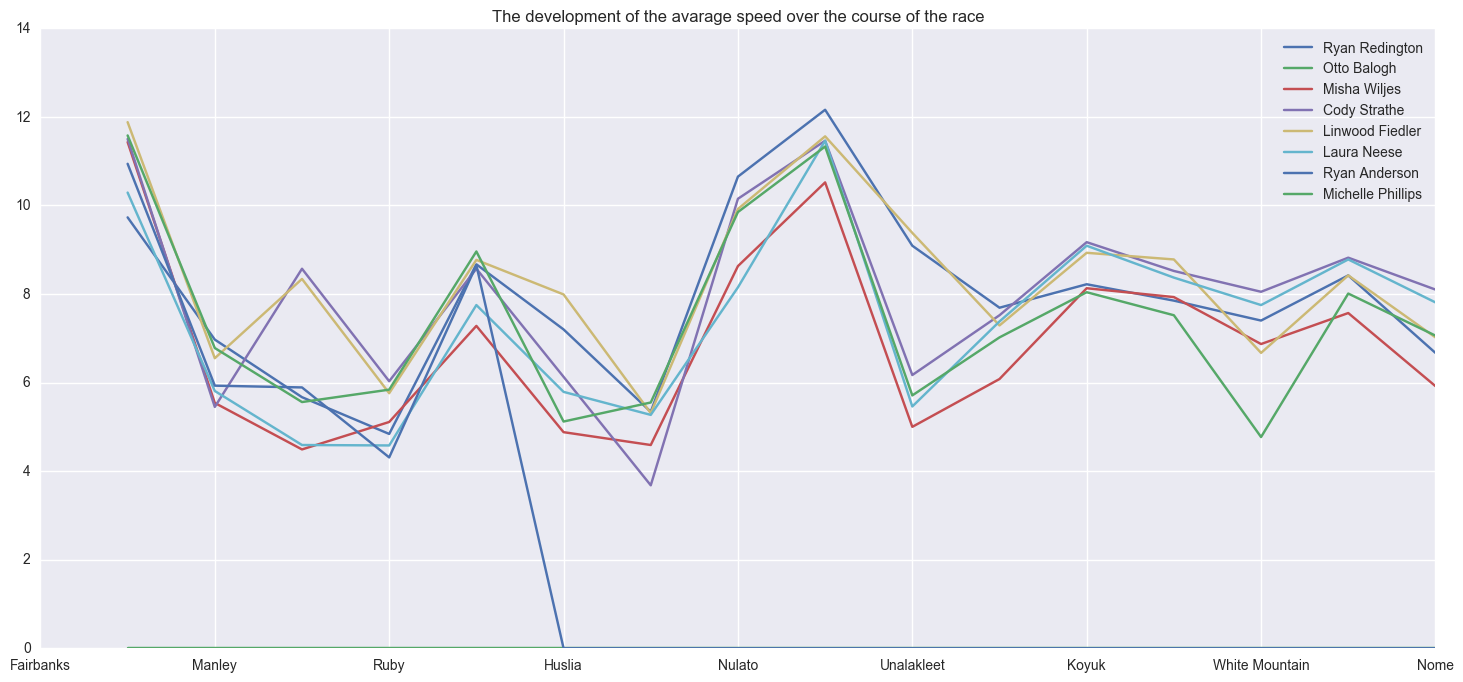

In [23]:
# Show the avarage speed at each checkpoint for 10 different mushers
mushers = pd.DataFrame(index=[times['Checkpoint'].unique()])
for nr in range(2,10):
    test = times[times['Number'] == nr]
    test['speed'] = test['Speed']
    musher1 = test[['speed']]
    if len(musher1) != 17:
        empty = pd.DataFrame([0.0 for n in range(17 - len(musher1))],columns=['speed'])
        musher1 = pd.concat([musher1,empty])
    musher1.index = times.Checkpoint.unique()
    musher1.columns = [test[['Name']].iloc[0,0]]
    mushers = pd.concat([mushers,musher1],axis=1,names=[test['Checkpoint']])

mushers.plot(kind='line', figsize=(18,8))
# plt.xlabel('Checkpoint')
# plt.ylabel('Avarage speed over distance between last and current checkpoint')
plt.title('The development of the avarage speed over the course of the race')
plt.show()

### The relationship between speed and amount of dogs

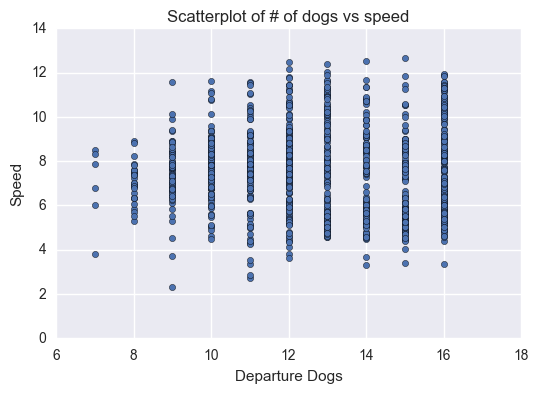

In [24]:
# Scatterplot displaying the relationship between the speed and the amount of dogs at departure

speed_matrix = pd.DataFrame()
for nr in range(2,74):
    test = times[times['Number'] == nr]
    if len(test) > 1:
        dogs = test['Departure Dogs'][:len(test)-1]
        speed = test['Speed'][1:]
        speed.index = dogs.index
        matrix = pd.concat([dogs,speed],axis=1)
        speed_matrix = pd.concat([speed_matrix,matrix])

speed_matrix.plot.scatter(x='Departure Dogs',y='Speed')
plt.title('Scatterplot of # of dogs vs speed')
plt.show()

### Relationship between distance and the speed of the leg.
The scatterplot below shows that there seems to be a relationship between the distance between two checkpoints and the speed on that leg. The differences in speed on 'middle distances' are more scattered than the extremes.

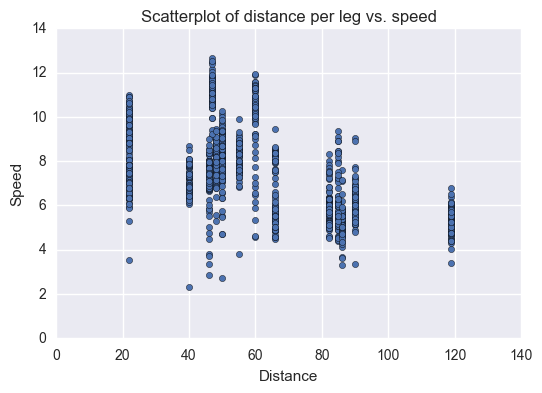

In [25]:
# Scatterplot displaying the relationship between the speed and the distance between checkpoints

distance_matrix = pd.DataFrame()
for nr in range(2,74):
    test = times[times['Number'] == nr]
    if len(test) > 1:
        distance = test['Distance'][1:]
        speed = test['Speed'][1:]
        matrix = pd.concat([distance,speed],axis=1)
        distance_matrix = pd.concat([distance_matrix,matrix])

distance_matrix.plot.scatter(x='Distance',y='Speed')
plt.title('Scatterplot of distance per leg vs. speed')
plt.show()

### Do veterans do better? 
This swarmplot shows that lower finish positions are mostly reserved for the rookies in the race.

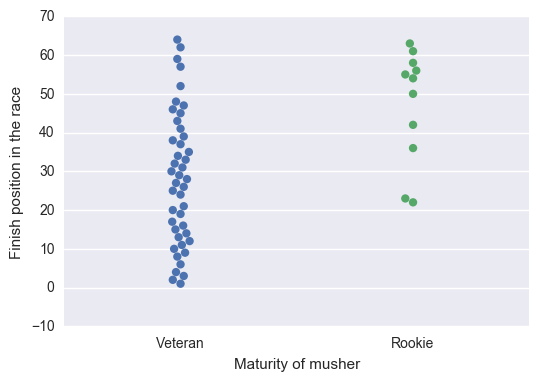

In [26]:
#Bee swarmplot of status vs finish position in the race
ax= sns.swarmplot(x='status', y='finish_position', data= race.sort_values('checkpoint')[1074:], size=6)
ax.set_xlabel("Maturity of musher")
ax.set_ylabel("Finish position in the race")
